In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Cleaned_Anime.csv')
df['Release_year'] = pd.to_datetime(df['Release_year'] )
df.info()
print(df[df['Tags'].str.contains(']', na = False)])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13254 entries, 0 to 13253
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    13254 non-null  int64         
 1   Name          13254 non-null  object        
 2   Rank          13254 non-null  float64       
 3   Rating        13254 non-null  float64       
 4   Release_year  13254 non-null  datetime64[ns]
 5   Episodes      13254 non-null  float64       
 6   Type          13254 non-null  object        
 7   Studio        13254 non-null  object        
 8   Tags          13254 non-null  object        
 9   staff         13254 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.0+ MB
Empty DataFrame
Columns: [Unnamed: 0, Name, Rank, Rating, Release_year, Episodes, Type, Studio, Tags, staff]
Index: []


# Average Rating for each studio

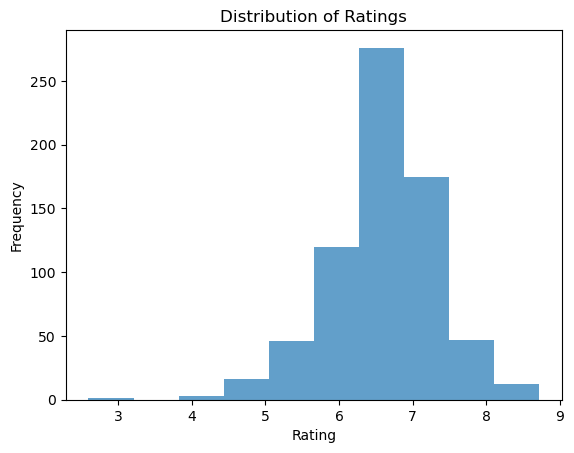

<Figure size 640x480 with 0 Axes>

In [464]:
#Adjust the case sensitive of the Studio column
Studio_Normalize = df.loc[:]

#Normalize Studio
Studio_Normalize['Studio'] = Studio_Normalize['Studio'].str.lower()
Studio_Normalize['Studio'] = Studio_Normalize['Studio'].str.capitalize()


Studio_Average_Rating = Studio_Normalize.groupby('Studio').\
agg({'Rating':'mean', 'Name':'count', 'Episodes':'sum' }).sort_values('Name', ascending = False)

#Average rating for studios who has made atleast 100 anime
Studio_100_plus =  Studio_Average_Rating[Studio_Average_Rating['Name'] >=100].\
sort_values('Rating', ascending = False)
Studio_100_plus

#Average rating for studios who has made atleast 50 anime
Studio_50_plus =  Studio_Average_Rating[Studio_Average_Rating['Name'] >=50].\
sort_values('Rating', ascending = False)
Studio_50_plus

#Average rating for studios who has made atleast 25 anime
Studio_25_plus =  Studio_Average_Rating[Studio_Average_Rating['Name'] >=25].\
sort_values('Rating', ascending = False)

Studio_Average_Rating['Rating'].plot(bins = 10, kind = 'hist', alpha=0.7)
# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Show the plot
plt.show()
plt.clf()

## Identify Animes that has atleast 6 of the most wanted Genres
Genre: 
Demon Slayer: Action, Adventure, Comedy, Drama, Fantasy, Shounen,Martial Arts, Violence

Dragon ball super: Action, Comedy, Aliens, Gods, Hand to Hand Combat, Martial Arts, Non-Human Protagonists, Superpowers  

One-Punch Man: Action, Comedy, Sci Fi, Seinen, Cyborgs, Monsters, Overpowered Main Characters, Parody, Satire, Superheroes, Superpowers, Based on a Manga, Explicit Violence

Overlord: Action, Adventure, Fantasy, Sci Fi, Dark Fantasy, Isekai, Magic, Overpowered Main Characters, Person in a Strange World, RPG, Skeletons, Trapped in a Video Game, Virtual Reality, Based on a Light Novel, Violence 

Jobless:Action, Adventure, Fantasy, Romance, Demons, Isekai, Magic, NEET, Person in a Strange World, Reincarnation, Based on a Light Novel, Bullying,, Mature Themes,, Sexual Content,, Violence  

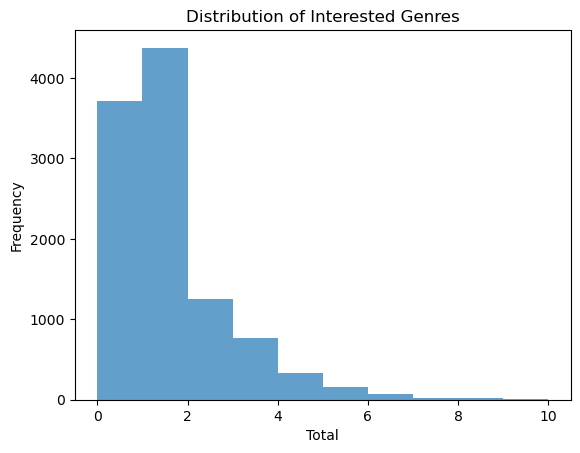

                                                                                                 Tags  \
Name                                                                                                    
How NOT to Summon a Demon Lord                      Action, Comedy, Ecchi, Fantasy, Shounen, Demon...   
Tsukimichi: Moonlit Fantasy                         Action, Adventure, Comedy, Fantasy, Shounen, I...   
The Seven Deadly Sins: Signs of Holy War            Action, Adventure, Fantasy, Shounen, Magic, Me...   
The Seven Deadly Sins: Revival of the Commandments  Action, Adventure, Fantasy, Shounen, Demons, M...   
The Seven Deadly Sins                               Action, Adventure, Fantasy, Shounen, Demons, M...   
That Time I Got Reincarnated as a Slime             Action, Adventure, Comedy, Fantasy, Shounen, C...   
Cautious Hero: The Hero Is Overpowered but Over...  Action, Adventure, Comedy, Fantasy, Demons, Go...   
How NOT to Summon a Demon Lord: Omega               Act

In [5]:

only_tags = df[df['Type']!= 'Movie'].loc[:,['Name','Tags','Studio']]
only_tags.dropna(inplace = True)

#Identify Genres. Comment out when not needed
#with pd.option_context('display.max_colwidth', None):
#    print(Studio_100_plus.loc['Bones'])

Interested_Genres = ['Action', 'Adventure', 'Comedy', 'Drama',\
'Fantasy','Shounen','Martial Arts', 'Violence','Superpowers',\
                     'Overpowered Main Characters','Isekai','Sexual Content','Magic']
only_tags[Interested_Genres] = 0
only_tags[Interested_Genres] = only_tags[Interested_Genres].astype(float)

#Remove square brackets 
only_tags['Tags'] = only_tags['Tags'].str.replace(r'\[|\]','',regex = True)
only_tags.set_index('Name', inplace=True)


#Algorithm to retrieve shows that has the interested Genres
for name, genres in zip(only_tags.index,only_tags['Tags']):
    tags = genres.split(',')
    
    for genre in tags:
        genre = genre.strip()
        #Add weights(Importance)to the genre
        if genre in ['Action', 'Adventure','Comedy','Isekai','Violence','Sexual Content']:
            only_tags.loc[name,genre] = 1
        elif genre in ['Fantasy','Shounen', 'Drama']:
            only_tags.loc[name,genre] = .5
        elif genre in ['Overpowered Main Characters','Superpowers','Martial Arts','Magic']:
            only_tags.loc[name,genre] = 2
            

only_tags['Total'] = only_tags.iloc[:,2:].sum(axis=1)
Six_or_More_Genres = only_tags[only_tags['Total'] > 5].sort_values('Total', ascending = False)            


#only_tags[only_tags.index.str.contains('Overlord')]

only_tags['Total'].plot(bins = 10, kind = 'hist', alpha=0.7)
# Set the labels and title
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Distribution of Interested Genres')

# Show the plot
plt.show()
with pd.option_context('display.max_rows', None):
    print(Six_or_More_Genres)


## Which studios had the most shows with 6 or more intereseting Genres

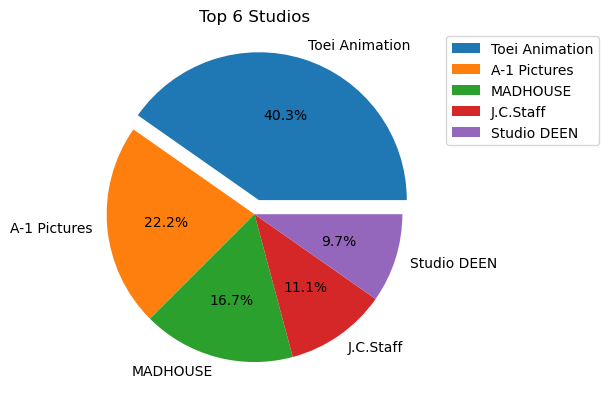

<Figure size 640x480 with 0 Axes>

In [6]:
studio_six_plus = Six_or_More_Genres.groupby('Studio').\
agg({'Studio':'size', 'Total':'sum'}).sort_values('Total',ascending = False)
studio_six_plus


#Determine the index of the maximum value
max_index = studio_six_plus['Studio'].idxmax()
# Create an explode list
explode = [0.1 if index == max_index else 0 for index in studio_six_plus.iloc[:5,0].index]

studio_six_plus.iloc[:5,0].plot(kind = 'pie', autopct = '%1.1f%%', explode= explode,
                                ylabel= '',labels = studio_six_plus.index)
plt.title('Top 6 Studios')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

## Analyze top 3 Studios which has interesting Genres
A-1 Pictures
Toei Animation
MADHOUSE


/var/folders/yp/nnhfbx9n055106j0nvvkcwlr0000gn/T/ipykernel_75561/1068517197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Three_Studios.loc[:,'Year_only'] = Top_Three_Studios.loc[:,'Release_year'].dt.year


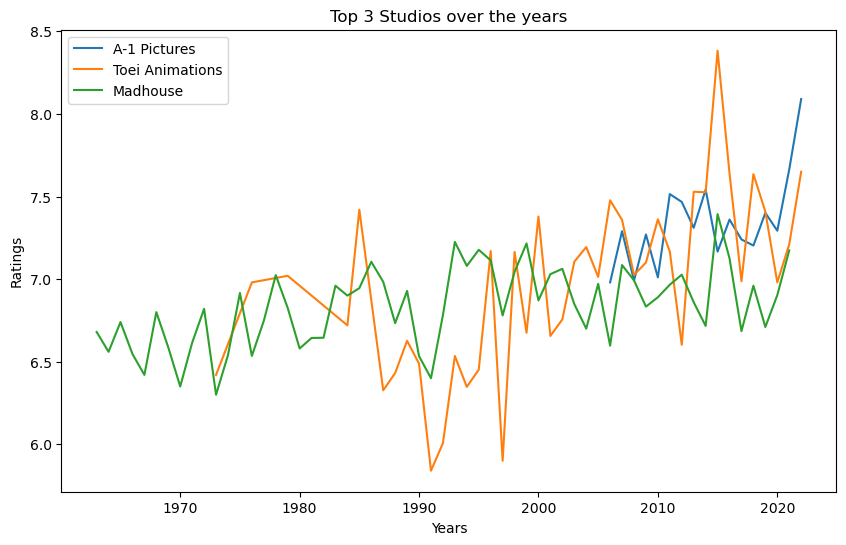

Rating  Name  Episodes
Studio         Year_only                          
A-1 pictures   2006       6.980000     1     175.0
               2007       7.290000     2      77.0
               2008       6.991429     7      89.0
               2009       7.270000    10     215.0
               2010       7.010526    19      90.0
...                            ...   ...       ...
Toei animation 2017       6.685000     8      63.0
               2018       6.960000     7     200.0
               2019       6.710000     6      63.0
               2020       6.902857     7     126.0
               2021       7.174000    10      14.0

[117 rows x 3 columns]

<Figure size 640x480 with 0 Axes>

In [466]:
#Retrieve top three studios Names and data
Top_Three_Studios = Studio_Normalize[(Studio_Normalize['Type']!= 'Movie') & (Studio_Normalize['Studio'].\
                                     isin(studio_six_plus.index[:3].str.lower().str.capitalize()))]

#Create a column to retrieve the year only
Top_Three_Studios.loc[:,'Year_only'] = Top_Three_Studios.loc[:,'Release_year'].dt.year


#How does Each Studio perform over the years
Top_Three_Studios_by_Year = Top_Three_Studios.groupby(['Studio','Year_only']).\
agg({'Rating':'mean', 'Name':'count', 'Episodes':'sum' })


# Plotting
plt.figure(figsize=(10, 6))

for studio in Top_Three_Studios_by_Year.index.get_level_values('Studio').unique():
    studio_data = Top_Three_Studios_by_Year.xs(studio, level='Studio')
    plt.plot(studio_data.index, studio_data['Rating'], label=studio)

plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Top 3 Studios over the years')
plt.legend(['A-1 Pictures', 'Toei Animations', 'Madhouse'])
plt.show()
plt.clf()

Top_Three_Studios_by_Year

# Ratio of amount of  shows produced by  top three Studios

<Figure size 1000x2000 with 0 Axes>

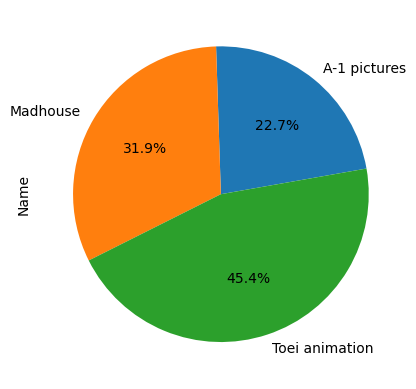

<Figure size 640x480 with 0 Axes>

In [455]:
TV_Show_Count_Top_Three = Top_Three_Studios.groupby('Studio').agg({'Name':'count'})

plt.figure(figsize=(10,20))
TV_Show_Count_Top_Three.plot(y='Name', kind = 'pie',\
                              autopct='%1.1f%%', startangle=10, legend = False)
plt.show()
plt.clf()


# Ratio of quality of shows produced by top three Studios

<Figure size 1000x2000 with 0 Axes>

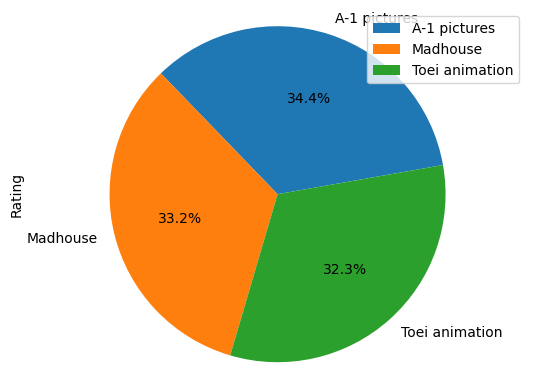

<Figure size 640x480 with 0 Axes>

In [456]:
Quality_Top_Three = Top_Three_Studios.groupby('Studio').agg({'Rating':'mean'})
plt.figure(figsize=(10,20))
Quality_Top_Three.plot(y='Rating', kind = 'pie',\
                             labels=TV_Show_Count_Top_Three.index, autopct='%1.1f%%', startangle=10)

plt.axis('equal')
plt.show()
plt.clf()


# Top 3 Anime for each Top 3 studio

In [413]:
Top_Three_Shows = Top_Three_Studios.sort_values('Rating', ascending = False).groupby('Studio').head(3)
Top_Three_Shows

,Unnamed: 0,Name,Rank,Rating,Release_year,Episodes,Type,Studio,Tags,staff,Content_Warning,Year_only
5573,5573,Hunter x Hunter (2011),14.0,9.02,2011-01-01,148.0,TV,Madhouse,"Action, Adventure, Drama, Fantasy, Shounen, Mo...","Yoshihiro Togashi : Original Creator, Hiroshi ...",Violence,2011
9818,9818,One-Punch Man,47.0,8.86,2015-01-01,12.0,TV,Madhouse,"Action, Comedy, Sci Fi, Seinen, Cyborgs, Monst...","Yuusuke Murata : Original Creator, One : Origi...",Explicit Violence,2015
8768,8768,Monster,273.0,8.84,2004-01-01,74.0,TV,Madhouse,"Drama, Mystery, Seinen, Conspiracy, Crime, Doc...","Naoki Urasawa : Original Creator, Masayuki Koj...","Mature Themes,, Domestic Abuse",2004
6263,6263,Kaguya-sama: Love Is War?,74.0,8.74,2020-01-01,12.0,TV,A-1 pictures,"Comedy, Drama, Romance, Seinen, Episodic, Love...","Aka Akasaka : Original Creator, Shinichi Omata...",NaN,2020
168,168,86 Part 2,NaN,8.71,2021-10-03,NaN,NaN,A-1 pictures,"'Action', 'Drama', 'Sci-Fi'",NaN,NaN,2021
3350,3350,ERASED,96.0,8.70,2016-01-01,12.0,TV,A-1 pictures,"Drama, Mystery, Seinen, Age Transformation, Cr...","Kei Sanbe : Original Creator, Tomohiko Itou : ...","Animal Abuse,, Mature Themes,, Physical Abuse,...",2016
9760,9760,One Piece,129.0,8.65,1999-01-01,100.0,TV,Toei animation,"Action, Adventure, Comedy, Fantasy, Shounen, P...","Eiichiro Oda : Original Creator, Tatsuya Nagam...",NaN,1999
14601,14601,World Trigger 3rd Season,268.0,8.44,2021-01-01,NaN,TV,Toei animation,"Action, Sci Fi, Shounen, Monsters, Based on a ...","Daisuke Ashihara : Original Creator, Morio Hat...",NaN,2021
8766,8766,Mononoke,471.0,8.43,2007-01-01,12.0,TV,Toei animation,"Horror, Abstract, Episodic, Exorcists, Japanes...",Kenji Nakamura : Director & Episode Director &...,NaN,2007
